# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Load Data

In [2]:
dataset = load_digits()

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([item.shape for item in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(1010, 64), (337, 64), (450, 64), (1010,), (337,), (450,)]


# Preview

In [8]:
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
X_train[25]

array([ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.,  0.,  2., 16., 16., 16.,
        7.,  0.,  0.,  0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  0.,
        6., 16., 15.,  7.,  0.,  0.,  0.,  0., 14., 10.,  6., 16.,  3.,
        0.,  0.,  1., 16.,  3.,  0., 16.,  7.,  0.,  0.,  0., 10., 11.,
       11., 15.,  3.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.])

In [10]:
y_train

array([1, 6, 9, ..., 4, 0, 4])

# Model

In [11]:
model = RandomForestClassifier(n_estimators=100)

In [12]:
%%time
model.fit(X_train, y_train)

Wall time: 310 ms


RandomForestClassifier()

In [13]:
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

In [14]:
print(f'Validation Accuracy: {val_acc:.2%}')

Validation Accuracy: 96.44%


# Evaluation 

In [15]:
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [16]:
print(f'Test Accuracy: {test_acc:.2%}')

Test Accuracy: 97.78%


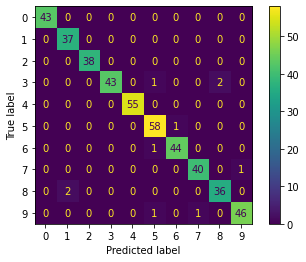

In [17]:
plot_confusion_matrix(model, X_test, y_test)

# Application

In [18]:
X_test.shape

(450, 64)

In [19]:
def application(idx=None):
    if not idx:
        idx = np.random.randint(X_test.shape[0])
    print('Collected new features as follows:')
    plt.imshow(X_test[idx].reshape(8,8))
    plt.show()
    forecasted = model.predict(X_test[idx:idx+1])[0]
    actual = y_test[idx]
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted}')
    print(f'\nActual data should be {actual}')

Collected new features as follows:


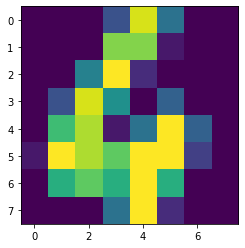


CORRECT

Model forecasted as 4

Actual data should be 4


In [20]:
application()